## 不同模型下的参数分布

In [1]:
import os

In [2]:
os.listdir("checkpoints/")

['cifar_cap_res5_0.1_model.ckpt',
 'cifar_sgn_res5_16.0_model.ckpt',
 'cifar_no_res5_model.ckpt',
 'cifar_cor_res5_4.0_model.ckpt']

In [3]:
import torch

In [4]:
MODEL_DIR = 'checkpoints/'
def load_params(path):
    return torch.load(MODEL_DIR+path)

In [5]:
param_cap = load_params('cifar_no_res5_model.ckpt')

In [6]:
param_cap.keys()

odict_keys(['conv1.weight', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'bn1.num_batches_tracked', 'layers_2n.0.conv1.weight', 'layers_2n.0.bn1.weight', 'layers_2n.0.bn1.bias', 'layers_2n.0.bn1.running_mean', 'layers_2n.0.bn1.running_var', 'layers_2n.0.bn1.num_batches_tracked', 'layers_2n.0.conv2.weight', 'layers_2n.0.bn2.weight', 'layers_2n.0.bn2.bias', 'layers_2n.0.bn2.running_mean', 'layers_2n.0.bn2.running_var', 'layers_2n.0.bn2.num_batches_tracked', 'layers_2n.1.conv1.weight', 'layers_2n.1.bn1.weight', 'layers_2n.1.bn1.bias', 'layers_2n.1.bn1.running_mean', 'layers_2n.1.bn1.running_var', 'layers_2n.1.bn1.num_batches_tracked', 'layers_2n.1.conv2.weight', 'layers_2n.1.bn2.weight', 'layers_2n.1.bn2.bias', 'layers_2n.1.bn2.running_mean', 'layers_2n.1.bn2.running_var', 'layers_2n.1.bn2.num_batches_tracked', 'layers_2n.2.conv1.weight', 'layers_2n.2.bn1.weight', 'layers_2n.2.bn1.bias', 'layers_2n.2.bn1.running_mean', 'layers_2n.2.bn1.running_var', 'layers_2n.2.bn1.nu

In [7]:
one_layer_params = param_cap['layers_6n.1.conv1.weight'] # Tensor变量

In [8]:
import matplotlib.pyplot as plt

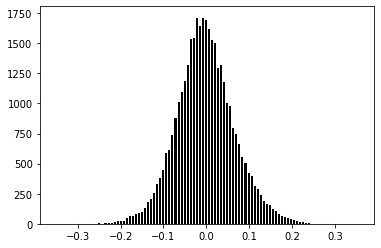

In [9]:
_ = plt.hist(one_layer_params.flatten().cpu().numpy(),bins=100,  facecolor="black", edgecolor="white")

In [10]:
LAYER_NAME = 'layers_6n.1.conv1.weight'
def draw_hist(path):
    params = load_params(path)
    one_layer_params = params[LAYER_NAME].flatten().cpu().numpy()
    _ = plt.hist(one_layer_params,bins=100,  facecolor="black", edgecolor="white")

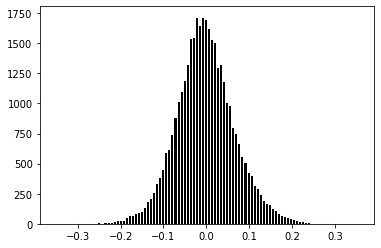

In [11]:
# no
draw_hist('cifar_no_res5_model.ckpt')

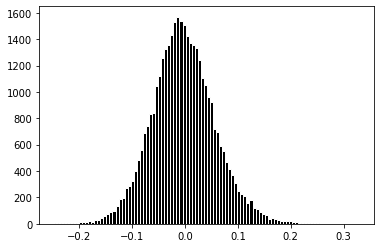

In [12]:
# cap
draw_hist('cifar_cap_res5_0.1_model.ckpt')

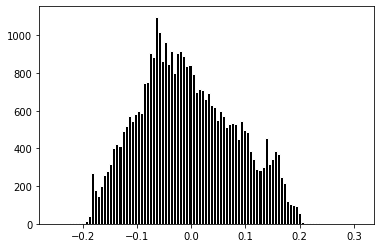

In [13]:
# cor
draw_hist('cifar_cor_res5_4.0_model.ckpt')

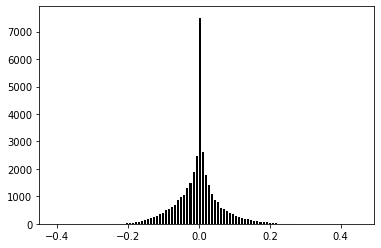

In [14]:
# sgn
draw_hist('cifar_sgn_res5_16.0_model.ckpt')

## 所有层的分布

In [15]:
def draw_all_dist(path):
    params = torch.load(MODEL_DIR+path)
    plt.figure()
    keys = [x for x in params.keys() if ('weight' in x) and ('conv' in x)]
    for i,x in enumerate(keys):
        plt.subplot(7,5,i+1)
        plt.hist(params[x].cpu().numpy().flatten(),bins=100,facecolor="blue", edgecolor="black")
        plt.axis('off')
    plt.show()

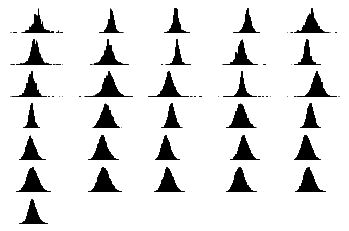

In [16]:
# no
draw_all_dist('cifar_no_res5_model.ckpt')

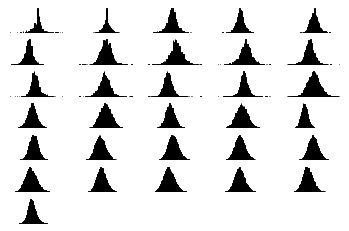

In [17]:
# cap
draw_all_dist('cifar_cap_res5_0.1_model.ckpt')

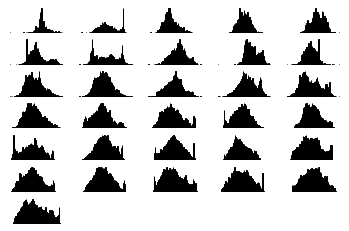

In [18]:
# cor
draw_all_dist('cifar_cor_res5_4.0_model.ckpt')

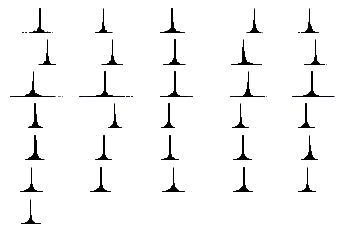

In [19]:
# sgn
draw_all_dist('cifar_sgn_res5_16.0_model.ckpt')